In [8]:
import torchvision
import torch
from torchview import draw_graph

In [9]:
class LateFusionNet(torch.nn.Module):
    def __init__(self, num_classes):
        super(LateFusionNet, self).__init__()
        # Separate convolutional layers for RGB and depth streams
        self.conv_rgb = torchvision.models.resnet18(pretrained=False)
        self.conv_rgb.fc = torch.nn.Identity()
        
        self.conv_depth = torchvision.models.resnet18(pretrained=False)
        self.conv_depth.conv1 = torch.nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.conv_depth.fc = torch.nn.Identity()
        
        # Fully connected layers for fusion
        self.fc1 = torch.nn.Linear(512 * 2, 128)  # Concatenating features from both streams
        self.fc2 = torch.nn.Linear(128, num_classes)  # Adjust num_classes based on your task
        
    def forward(self, rgbd_inputs):
        rgb_inputs = rgbd_inputs[:,:3,:,:]
        depth_inputs = rgbd_inputs[:,3,:,:].unsqueeze(1)

        # Forward pass for RGB stream
        rgb_features = self.conv_rgb(rgb_inputs)
        # Forward pass for depth stream
        depth_features = self.conv_depth(depth_inputs)
        
        # Concatenate features from both streams
        combined_features = torch.cat((rgb_features, depth_features), dim=1)
        
        # Fully connected layers for fusion
        x = self.fc1(combined_features)
        x = torch.relu(x)
        x = self.fc2(x)
        return x



(process:16340): Pango-WARNING **: 20:19:22.801: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


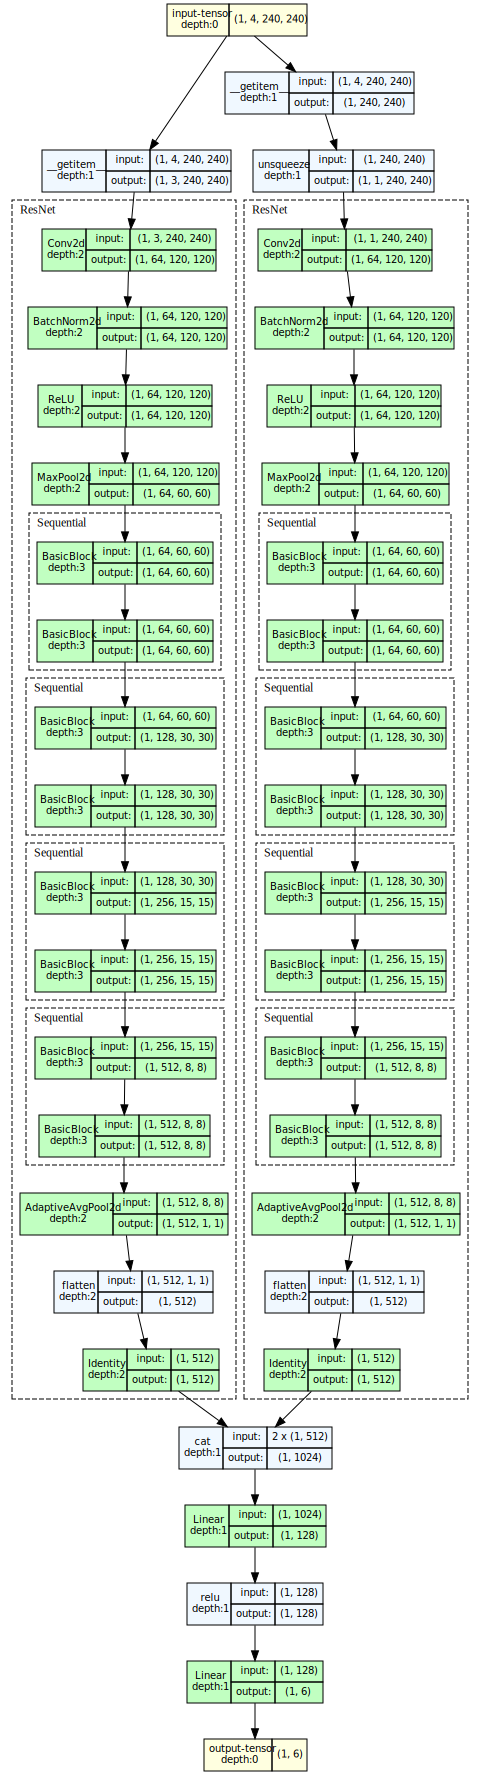

In [16]:
model = LateFusionNet(6)
model_graph = draw_graph(model, input_size=(1,4,240,240), expand_nested=True)
model_graph.visual_graph


(process:13636): Pango-WARNING **: 20:33:05.265: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


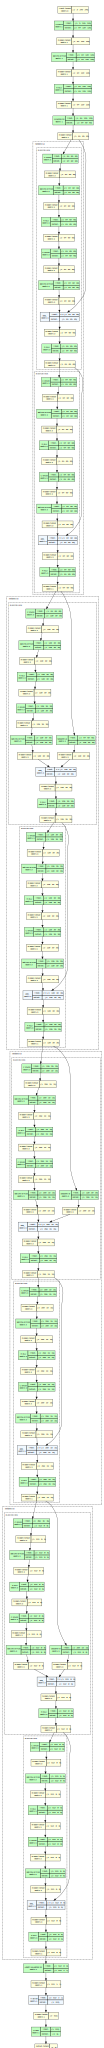

In [22]:
model = torchvision.models.resnet18(pretrained=False)
model.fc = torch.nn.Linear(512, 6)
model_graph = draw_graph(model, input_size=(1,3,240,240), expand_nested=True)
model_graph.visual_graph